In [2]:
import numpy as np
import random
import math
import heapq
import multiprocess as mp
import talib as ta
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime,date
import time
from island_ga import IslandGGA 
from chromosome import Chromosome 
from data_preprocessing import Data
import itertools
import yfinance as yf
import datetime
from pso import PSOPortfolioOptimizer
from tqdm import tqdm

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


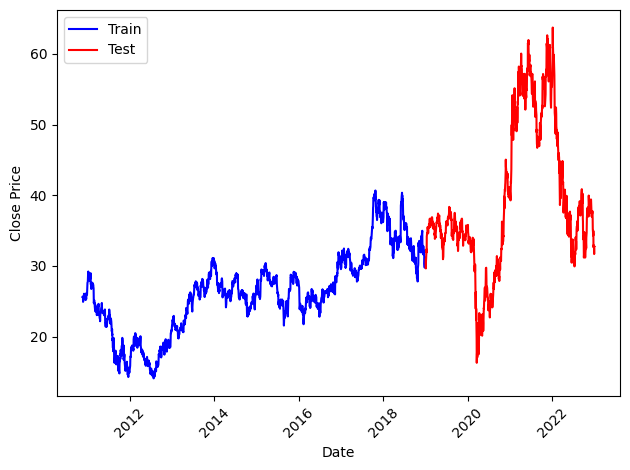

In [3]:
#GM
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
period ="train"
data = Data('GM',start_date,end_date,period,2019)
data.data_preprocess()

In [4]:



# You’ll need this import
from pso import PSOPortfolioOptimizer

# Parameter search space
param_space = {
    "num_particles": [10, 30, 50, 100],
    "iterations": [10, 30, 50, 100],
    "w": [0.4, 0.6, 0.7, 0.9],
    "c1": [1.0, 1.5, 2.0, 2.5],
    "c2": [1.0, 1.5, 2.0, 2.5]
}

# Results store
results = []

# Number of random trials
num_trials = 10

for trial in tqdm(range(num_trials)):
    # Randomly sample parameters
    num_particles = random.choice(param_space["num_particles"])
    iterations = random.choice(param_space["iterations"])
    w = random.choice(param_space["w"])
    c1 = random.choice(param_space["c1"])
    c2 = random.choice(param_space["c2"])

    try:
        # Run PSO with sampled params
        pso = PSOPortfolioOptimizer(
            data=data.train_data,
            strategies=data.strategies,
            num_particles=num_particles,
            iterations=iterations,
            inertia_weight=w,
            cognitive_weight=c1,
            social_weight=c2
        )

        train_profit, train_mdd, train_fitness = pso.run()

        # Evaluate on test data if available
        if hasattr(data, "test_data"):
            test_profit, test_mdd, test_fitness = pso.evaluate_on_data(data.test_data)
        else:
            test_profit = test_mdd = test_fitness = None

        results.append({
            "num_particles": num_particles,
            "iterations": iterations,
            "w": w,
            "c1": c1,
            "c2": c2,
            "train_profit": train_profit,
            "train_mdd": train_mdd,
            "train_fitness": train_fitness,
            "test_profit": test_profit,
            "test_mdd": test_mdd,
            "test_fitness": test_fitness
        })
        
    except Exception as e:
        print(f"Trial {trial} failed: {e}")
        continue

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Sort by test fitness if available, otherwise train fitness
sort_key = "test_fitness" if "test_fitness" in results_df.columns and results_df["test_fitness"].notna().any() else "train_fitness"
top_results = results_df.sort_values(by=sort_key, ascending=False)

# Show top 5 configurations
print(top_results.head(5))


 70%|███████   | 7/10 [27:36<17:16, 345.53s/it]/Users/kudakwashechideme/repos/genetic_algo_venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/Users/kudakwashechideme/repos/island_genetic_algrorithm/pso.py:151: RuntimeWarning: invalid value encountered in double_scalars
  return profit / mdd if mdd > 0.01 else profit
100%|██████████| 10/10 [39:22<00:00, 236.23s/it]

   num_particles  iterations    w   c1   c2  train_profit      train_mdd  \
7             30          30  0.7  2.5  2.5           inf  6.581556e+300   
9             50          50  0.7  1.5  2.5      1.496996   8.452573e-02   
5             30          10  0.6  2.5  2.0      1.983088   1.809623e-01   
6             50         100  0.7  1.5  2.0      1.647563   8.234443e-02   
8             50          30  0.7  2.0  1.5      0.597339   3.740568e-02   

   train_fitness    test_profit       test_mdd  test_fitness  
7            inf  1.792164e+156  4.027305e+152   4450.032922  
9      17.710541   5.705922e-01   7.673138e-02      7.436230  
5      10.958568   1.074935e+00   1.825179e-01      5.889480  
6      20.008191   4.309283e-01   7.863392e-02      5.480183  
8      15.969214   2.245674e-01   6.409656e-02      3.503580  
